#**Problem1**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools

In [7]:
play_df = pd.read_csv('/content/drive/My Drive/ML_project/PlayList.csv')
#lets start cleaning up and extracting information.
unique_players = play_df.PlayerKey.nunique()
unique_plays = play_df.PlayKey.nunique()
unique_games = play_df.GameID.nunique()
print('There are {} players in the dataset.'.format(unique_players))
print('There are {} games in the dataset.'.format(unique_games))
print('There are {} plays in the dataset.'.format(unique_plays))
play_df.head()  

There are 250 players in the dataset.
There are 5712 games in the dataset.
There are 267005 plays in the dataset.


,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [8]:
game_df = play_df[['GameID', 'StadiumType', 'FieldType', 'Weather', 'Temperature']].drop_duplicates().reset_index().drop(columns=['index'])
game_df.head()

,GameID,StadiumType,FieldType,Weather,Temperature
0,26624-1,Outdoor,Synthetic,Clear and warm,63
1,26624-2,Indoors,Synthetic,Mostly Cloudy,85
2,26624-3,Outdoor,Synthetic,Sunny,84
3,26624-4,Outdoor,Synthetic,Sunny,61
4,26624-5,Outdoor,Natural,Clear,76


*** Understand the part below , important for understanding the data ***

In [9]:
def add_value_labels(ax, spacing=5, decimals = 0):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        format_str = "{:." + str(decimals) + "f}"
        label = format_str.format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
                        xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values
def visualize_game_features(game_df, rotation = 90, add_labels = False, figsize=(10,10)):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(4, 3, hspace=0.2, wspace=0.2)
    stadium_ax = fig.add_subplot(grid[0, :2])
    fieldtype_ax = fig.add_subplot(grid[0, 2])
    weather_ax = fig.add_subplot(grid[1, 0:])
    temperature_ax = fig.add_subplot(grid[2, 0:])
    

    stadium_ax.bar(game_df.StadiumType.value_counts().keys(), game_df.StadiumType.value_counts().values, color='#00c2c7')
    stadium_ax.set_title('StadiumType')
    stadium_ax.set_xticklabels(game_df.StadiumType.value_counts().keys(), rotation=rotation)
    
    if add_labels:
        add_value_labels(stadium_ax, spacing=5)

    fieldtype_ax.bar(game_df.FieldType.value_counts().keys(), game_df.FieldType.value_counts().values, color=['#00c2c7', '#ff9e15'])
    fieldtype_ax.set_title('FieldType')
    fieldtype_ax.set_xticklabels(game_df.FieldType.value_counts().keys(), rotation=0)
    
    if add_labels:
        add_value_labels(fieldtype_ax, spacing=5)

    weather_ax.bar(game_df.Weather.value_counts().keys(), game_df.Weather.value_counts().values, color='#00c2c7')
    weather_ax.set_title('Weather')
    weather_ax.set_xticklabels(game_df.Weather.value_counts().keys(), rotation=rotation)
    
    if add_labels:
        add_value_labels(weather_ax, spacing=5)
        
    temperature_ax.hist(game_df.Temperature.astype(int).values, bins=30, range=(0,90))
    temperature_ax.set_xlim(0,110)
    temperature_ax.set_xticks(range(0,110,10))
    temperature_ax.set_xticklabels(range(0,110,10))
    temperature_ax.set_title('Temperature')
    


    plt.suptitle('Game-Level Exploration', fontsize=16)
    plt.show()

In [10]:
def clean_weather(row):
    cloudy = ['Cloudy 50% change of rain', 'Hazy', 'Cloudy.', 'Overcast', 'Mostly Cloudy',
          'Cloudy, fog started developing in 2nd quarter', 'Partly Cloudy',
          'Mostly cloudy', 'Rain Chance 40%',' Partly cloudy', 'Party Cloudy',
          'Rain likely, temps in low 40s', 'Partly Clouidy', 'Cloudy, 50% change of rain','Mostly Coudy', '10% Chance of Rain',
          'Cloudy, chance of rain', '30% Chance of Rain', 'Cloudy, light snow accumulating 1-3"',
          'cloudy', 'Coudy', 'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
         'Cloudy fog started developing in 2nd quarter', 'Cloudy light snow accumulating 1-3"',
         'Cloudywith periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
         'Cloudy 50% change of rain', 'Cloudy and cold',
       'Cloudy and Cool', 'Partly cloudy']
    
    clear = ['Clear, Windy',' Clear to Cloudy', 'Clear, highs to upper 80s',
             'Clear and clear','Partly sunny',
             'Clear, Windy', 'Clear skies', 'Sunny', 'Partly Sunny', 'Mostly Sunny', 'Clear Skies',
             'Sunny Skies', 'Partly clear', 'Fair', 'Sunny, highs to upper 80s', 'Sun & clouds', 'Mostly sunny','Sunny, Windy',
             'Mostly Sunny Skies', 'Clear and Sunny', 'Clear and sunny','Clear to Partly Cloudy', 'Clear Skies',
            'Clear and cold', 'Clear and warm', 'Clear and Cool', 'Sunny and cold', 'Sunny and warm', 'Sunny and clear']
    
    rainy = ['Rainy', 'Scattered Showers', 'Showers', 'Cloudy Rain', 'Light Rain', 'Rain shower', 'Rain likely, temps in low 40s.', 'Cloudy, Rain']
    
    snow = ['Heavy lake effect snow']
    
    indoor = ['Controlled Climate', 'Indoors', 'N/A Indoor', 'N/A (Indoors)']
        
    if row.Weather in cloudy:
        return 'Cloudy'
    
    if row.Weather in indoor:
        return 'Indoor'
    
    if row.Weather in clear:
        return 'Clear'
    
    if row.Weather in rainy:
        return 'Rain'
    
    if row.Weather in snow:
        return 'Snow'
      
    if row.Weather in ['Cloudy.', 'Heat Index 95', 'Cold']:
        return np.nan
    
    return row.Weather

def clean_stadiumtype(row):
    if row.StadiumType in ['Bowl', 'Heinz Field', 'Cloudy']:
        return np.nan
    else:
        return row.StadiumType

def clean_play_df(play_df):
    play_df_cleaned = play_df.copy()
    
    # clean StadiumType
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(r'Oudoor|Outdoors|Ourdoor|Outddors|Outdor|Outside', 'Outdoor')
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(r'Indoors|Indoor, Roof Closed|Indoor, Open Roof', 'Indoor')
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(r'Closed Dome|Domed, closed|Domed, Open|Domed, open|Dome, closed|Domed', 'Dome')
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace(r'Retr. Roof-Closed|Outdoor Retr Roof-Open|Retr. Roof - Closed|Retr. Roof-Open|Retr. Roof - Open|Retr. Roof Closed', 'Retractable Roof')
    play_df_cleaned['StadiumType'] = play_df_cleaned['StadiumType'].str.replace('Open', 'Outdoor')
    play_df_cleaned['StadiumType'] = play_df_cleaned.apply(lambda row: clean_stadiumtype(row), axis=1)
    
    # clean Weather
    play_df_cleaned['Weather'] = play_df_cleaned.apply(lambda row: clean_weather(row), axis=1)
    
    return play_df_cleaned

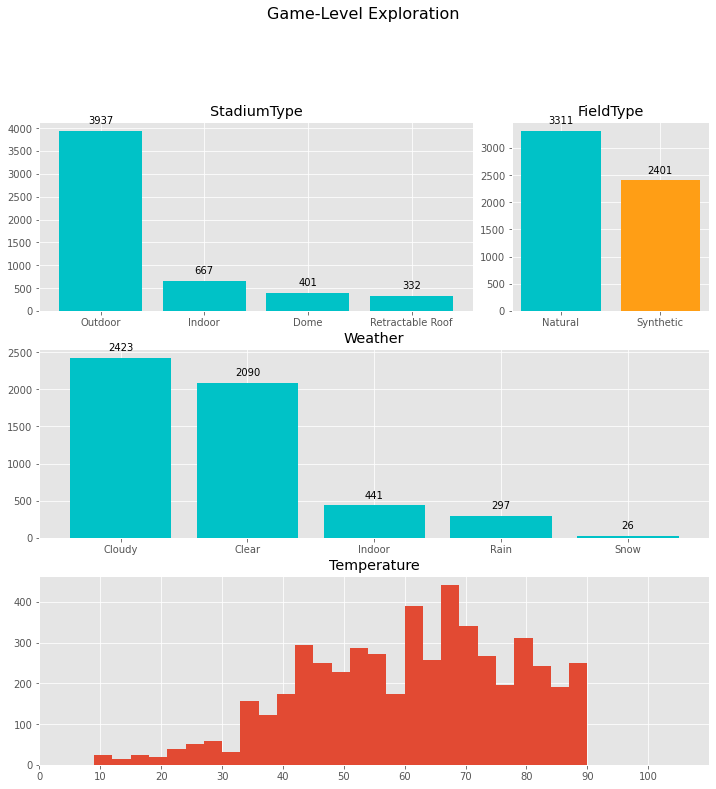

,GameID,StadiumType,FieldType,Weather,Temperature
0,26624-1,Outdoor,Synthetic,Clear,63
1,26624-2,Indoor,Synthetic,Cloudy,85
2,26624-3,Outdoor,Synthetic,Clear,84
3,26624-4,Outdoor,Synthetic,Clear,61
4,26624-5,Outdoor,Natural,Clear,76


In [12]:
play_df_cleaned = clean_play_df(play_df)
game_df_cleaned = play_df_cleaned[['GameID', 'StadiumType', 'FieldType', 'Weather', 'Temperature']].drop_duplicates().reset_index().drop(columns=['index'])
visualize_game_features(game_df_cleaned, rotation=0, add_labels = True, figsize=(12,16))
game_df_cleaned.head()

The diagrams above show:

* The majority of the games are played outdoors. That's why the weather should be important.
* Synthetic turf is very common, but there are around 30% more games with natural turf.
* The temperature and other weather conditions vary greately. 

It will be interesting to look at how the temperature affects the injuries.

In [13]:
player_data_df = play_df_cleaned[['PlayerKey', 'RosterPosition', 'PlayerGamePlay', 'Position', 'PositionGroup']]

In [14]:
def visualize_player_features(player_df, figsize=(25,20), add_labels=False):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=figsize)
    
    grid = plt.GridSpec(3, 4, hspace=0.2, wspace=0.2)
    
    plays_ax = fig.add_subplot(grid[0, 0:2])
    max_rolling_plays_ax = fig.add_subplot(grid[1, 0:2])
    
    rosterposition_ax = fig.add_subplot(grid[0, 2:])
    positiongroup_ax = fig.add_subplot(grid[1, 2:])
    position_ax = fig.add_subplot(grid[2, 0:])
    
    plays_ax.hist(player_df.groupby(by=['PlayerKey']).count()['RosterPosition'].values, color='#00c2c7',bins=50)
    plays_ax.set_title('Number of plays per player')
    #play_ax.set
    
    max_rolling_plays_ax.hist(player_df.groupby(by=['PlayerKey']).PlayerGamePlay.max().values, bins=30, color='#00c2c7')
    max_rolling_plays_ax.set_title('Maximum number of rolling plays per player')
    
    rosterposition_ax.bar(player_df.RosterPosition.value_counts().keys().values, player_df.RosterPosition.value_counts().values)
    rosterposition_ax.set_xticklabels(player_df.RosterPosition.value_counts().keys().values, rotation=20)
    rosterposition_ax.set_title('Roster Position')
    if add_labels:
        add_value_labels(rosterposition_ax, spacing=5)
    
    position_ax.bar(player_df.Position.value_counts().keys().values, player_df.Position.value_counts().values, color='#ff9e15')
    position_ax.set_title('Position')
    if add_labels:
        add_value_labels(position_ax, spacing=5)
        
    positiongroup_ax.bar(player_df.PositionGroup.value_counts().keys().values, player_df.PositionGroup.value_counts().values)
    positiongroup_ax.set_title('Position Group')
    if add_labels:
        add_value_labels(positiongroup_ax, spacing=5)
    
    plt.suptitle('Player-Level Exploration', fontsize=16)
    plt.show()

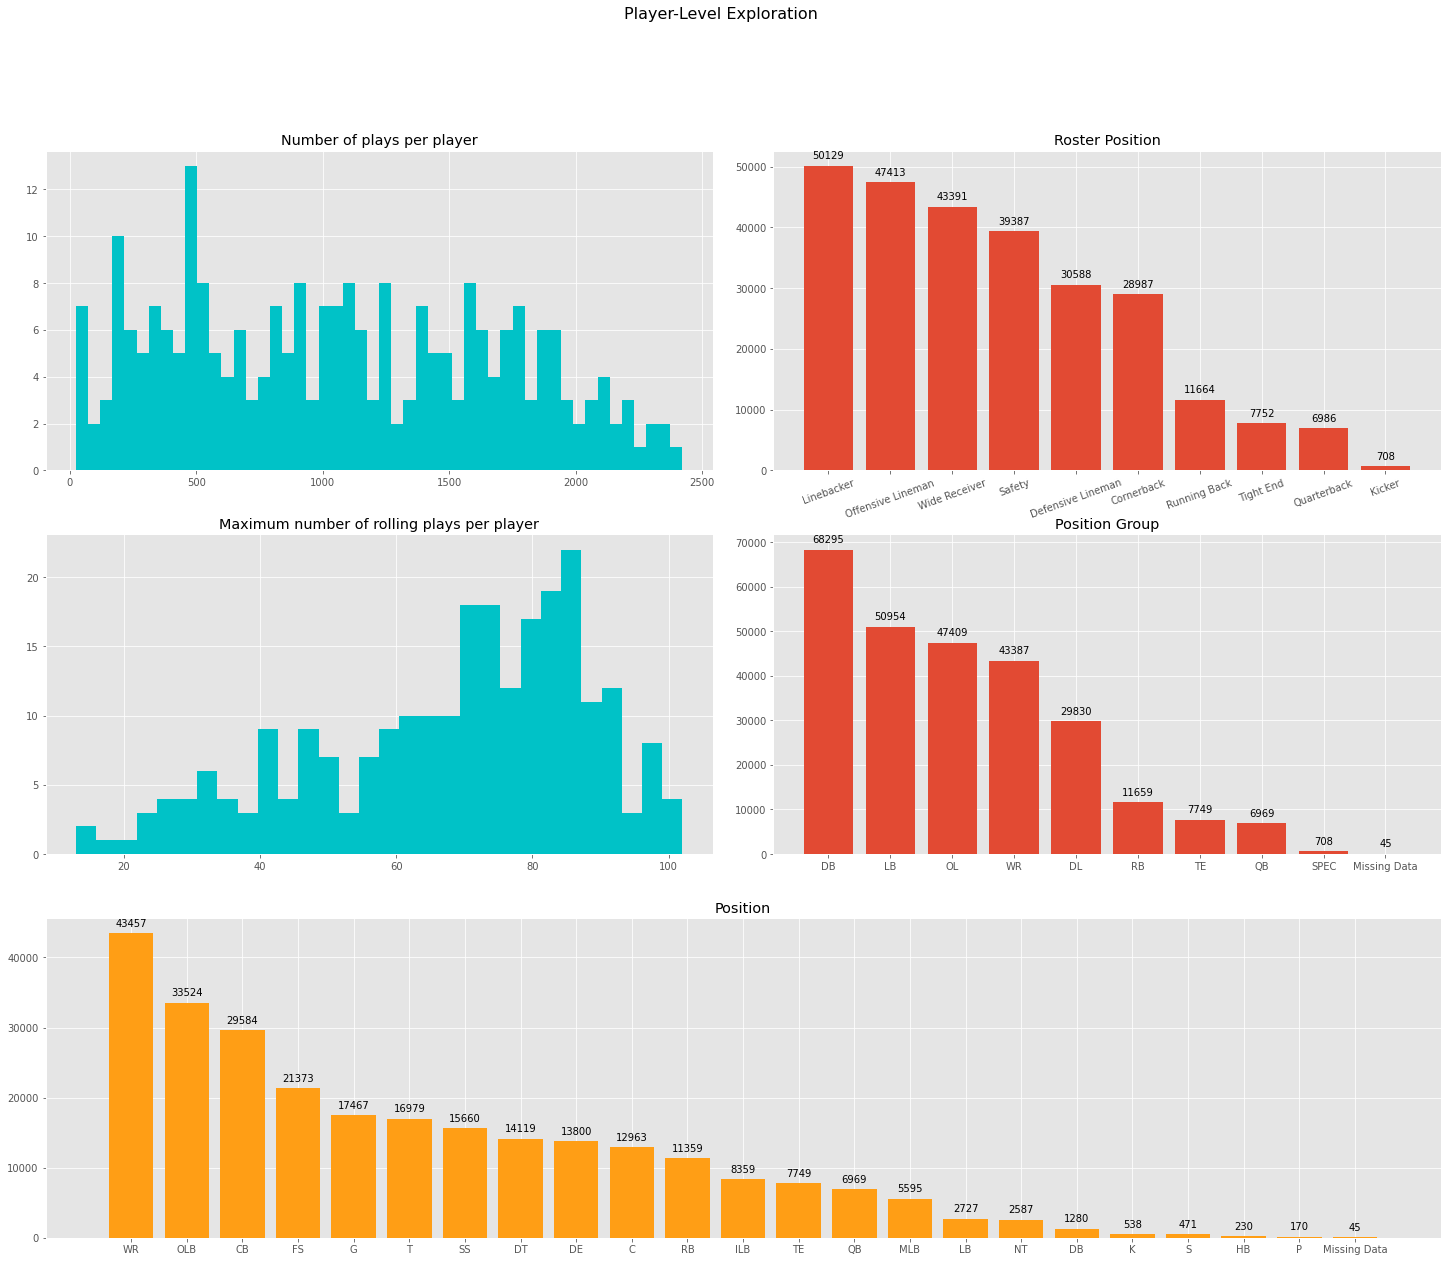

In [15]:
visualize_player_features(player_data_df, add_labels=True)

These diagrams above show that the circumstances around the players vary greatly: some players do much more games than the others, there is a lot of different playing position. All of these factors can contribute to injuries.

In [16]:
def visualize_play(play_df_cleaned):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    
    plt.bar(play_df_cleaned.PlayType.value_counts().keys().values, play_df_cleaned.PlayType.value_counts().values)
    plt.xticks(range(len(play_df_cleaned.PlayType.value_counts().keys().values)), play_df_cleaned.PlayType.value_counts().keys().values, rotation=20)
    add_value_labels(ax, spacing=5)
    plt.title('Play-Level Exploration: PlayType', fontsize=16)
    
    plt.show()

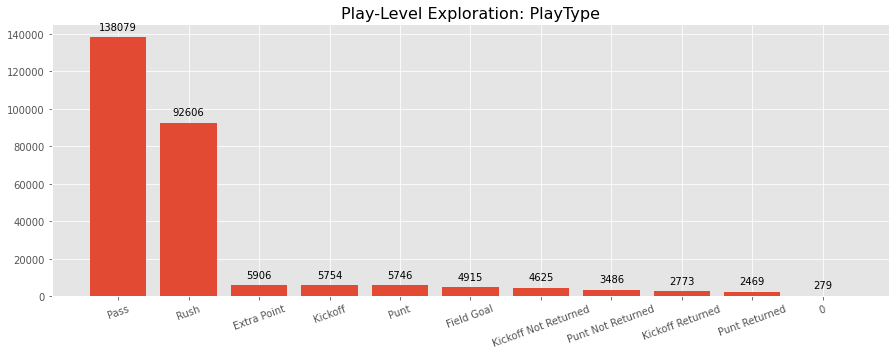

In [17]:
visualize_play(play_df_cleaned)

In [18]:
play_df_cleaned.head()

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,5,QB,QB


In [19]:
injury_df = pd.read_csv('/content/drive/My Drive/ML_project/InjuryRecord.csv')
injury_df.columns

Index(['PlayerKey', 'GameID', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

In [20]:
df1 =  play_df_cleaned.drop_duplicates('GameID')
df1

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,1,QB,QB
81,26624,26624-2,26624-2-1,Quarterback,11,2,Indoor,Synthetic,85,Cloudy,Pass,1,QB,QB
157,26624,26624-3,26624-3-1,Quarterback,18,3,Outdoor,Synthetic,84,Clear,Rush,1,QB,QB
221,26624,26624-4,26624-4-1,Quarterback,25,4,Outdoor,Synthetic,61,Clear,Pass,1,QB,QB
291,26624,26624-5,26624-5-1,Quarterback,29,5,Outdoor,Natural,76,Clear,Pass,1,QB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266741,47888,47888-9,47888-9-1,Cornerback,71,9,Outdoor,Synthetic,53,Cloudy,Pass,1,DB,DB
266795,47888,47888-10,47888-10-1,Cornerback,78,10,Outdoor,Natural,82,Cloudy,Rush,1,DB,DB
266833,47888,47888-11,47888-11-1,Cornerback,85,11,Outdoor,Natural,42,Cloudy,Pass,1,DB,DB
266889,47888,47888-12,47888-12-1,Cornerback,92,12,Outdoor,Synthetic,40,Clear,Rush,1,DB,DB


In [21]:
game_injury_df = injury_df.set_index('GameID').join(df1.set_index('GameID'), how = 'outer',lsuffix='_left', rsuffix='_right')
copy_game_injury = game_injury_df.copy()
game_injury_df['DM_M1'] = game_injury_df['DM_M1'].fillna(0).astype(int)
game_injury_df['DM_M7'] = game_injury_df['DM_M7'].fillna(0).astype(int)
game_injury_df['DM_M28'] = game_injury_df['DM_M28'].fillna(0).astype(int)
game_injury_df['DM_M42'] = game_injury_df['DM_M42'].fillna(0).astype(int)
game_injury_df['Injury'] = game_injury_df['DM_M1'] + game_injury_df['DM_M7'] + game_injury_df['DM_M28'] + game_injury_df['DM_M42']
lis= []
for i in range(len(game_injury_df['Injury'])):
  if(game_injury_df['Injury'][i]>0):
    lis.append(1)
  else:
    lis.append(0)
game_injury_df['Injury']=lis

game_injury_df.drop(columns=['PlayerKey_left','BodyPart', 'PlayKey_right','PlayKey_left', 'PlayerKey_right', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42','Surface','PlayerGamePlay'],axis=1,inplace=True)
condition=game_injury_df['Injury']==0
condition1 = game_injury_df['Injury']==1
game_injury_df1= game_injury_df[condition][:int(len(game_injury_df)*1)]
game_injury_df2 = game_injury_df[condition1]
frames=[game_injury_df1,game_injury_df2]
features_df=pd.concat(frames)

features_df = pd.get_dummies(features_df, dummy_na = False)
features_df

,PlayerDay,PlayerGame,Temperature,Injury,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Kicker,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Quarterback,RosterPosition_Running Back,RosterPosition_Safety,RosterPosition_Tight End,RosterPosition_Wide Receiver,StadiumType_Dome,StadiumType_Indoor,StadiumType_Outdoor,StadiumType_Retractable Roof,FieldType_Natural,FieldType_Synthetic,Weather_Clear,Weather_Cloudy,Weather_Indoor,Weather_Rain,Weather_Snow,PlayType_0,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush,Position_C,Position_CB,Position_DB,Position_DE,Position_DT,Position_FS,Position_G,Position_HB,Position_ILB,Position_K,Position_LB,Position_MLB,Position_NT,Position_OLB,Position_P,Position_QB,Position_RB,Position_S,Position_SS,Position_T,Position_TE,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_QB,PositionGroup_RB,PositionGroup_SPEC,PositionGroup_TE,PositionGroup_WR
GameID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26624-1,1,1,63,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26624-10,74,10,66,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26624-11,81,11,47,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26624-12,88,12,48,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26624-13,96,13,55,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47307-10,74,10,68,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
47307-10,74,10,68,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
47334-8,58,8,74,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [22]:
df = pd.read_csv('/content/drive/My Drive/ML_project/file1.csv')
df

,GameID,PlayerDay,PlayerGame,Temperature,Injury,RosterPosition_Defensive Lineman,RosterPosition_Kicker,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Quarterback,RosterPosition_Running Back,RosterPosition_Safety,RosterPosition_Tight End,RosterPosition_Wide Receiver,StadiumType_Indoor,StadiumType_Outdoor,StadiumType_Retractable Roof,FieldType_Synthetic,Weather_Cloudy,Weather_Indoor,Weather_Rain,Weather_Snow,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush,Position_CB,Position_DB,Position_DE,Position_DT,Position_FS,Position_G,Position_HB,Position_ILB,Position_K,Position_LB,Position_MLB,Position_NT,Position_OLB,Position_P,Position_QB,Position_RB,Position_S,Position_SS,Position_T,Position_TE,Position_WR,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_QB,PositionGroup_RB,PositionGroup_SPEC,PositionGroup_TE,PositionGroup_WR
0,26624-1,1,1,63,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,26624-10,74,10,66,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,26624-11,81,11,47,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,26624-12,88,12,48,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,26624-13,96,13,55,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,47307-10,74,10,68,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5709,47307-10,74,10,68,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5710,47334-8,58,8,74,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5711,47382-3,18,3,-999,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
df.loc[(df.Temperature == -999),'Temperature']= 55

#changing the playdate values
df["PlayerDay"] = df["PlayerDay"].abs()
features_df=df.set_index('GameID')
features_df

,PlayerDay,PlayerGame,Temperature,Injury,RosterPosition_Defensive Lineman,RosterPosition_Kicker,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Quarterback,RosterPosition_Running Back,RosterPosition_Safety,RosterPosition_Tight End,RosterPosition_Wide Receiver,StadiumType_Indoor,StadiumType_Outdoor,StadiumType_Retractable Roof,FieldType_Synthetic,Weather_Cloudy,Weather_Indoor,Weather_Rain,Weather_Snow,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush,Position_CB,Position_DB,Position_DE,Position_DT,Position_FS,Position_G,Position_HB,Position_ILB,Position_K,Position_LB,Position_MLB,Position_NT,Position_OLB,Position_P,Position_QB,Position_RB,Position_S,Position_SS,Position_T,Position_TE,Position_WR,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_QB,PositionGroup_RB,PositionGroup_SPEC,PositionGroup_TE,PositionGroup_WR
GameID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26624-1,1,1,63,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26624-10,74,10,66,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26624-11,81,11,47,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26624-12,88,12,48,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
26624-13,96,13,55,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47307-10,74,10,68,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47307-10,74,10,68,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47334-8,58,8,74,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score

59
0    5608
1    2804
Name: T, dtype: int64
[[  1   1  63 ...   0   0   0]
 [ 74  10  66 ...   0   0   0]
 [ 81  11  47 ...   0   0   0]
 ...
 [439  24  68 ...   0   0   0]
 [365  12  58 ...   0   0   0]
 [ 39   5  48 ...   0   0   1]] [0 0 0 ... 1 1 1]
GaussianNB
Accuracy: 0.41532976827094475
Confusion Matrix: 
 [[150 984]
 [  0 549]]
F1-score
0.5273775216138328


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


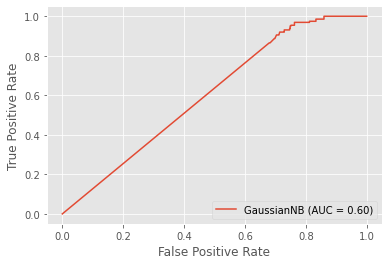

In [27]:
res = RandomOverSampler(random_state=0,sampling_strategy=0.5)
y = features_df['Injury']
X = features_df.drop(columns=['Injury'])
y=np.array(y)
X=np.array(X)
print(len(X[0]))



X_resampled, y_resampled = res.fit_resample(X, y)
dt_yresam = pd.DataFrame(y_resampled)
dt_yresam.columns = ['T']
print(dt_yresam['T'].value_counts())
print(X_resampled,y_resampled) 

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=21,shuffle=True)    
#y_train, y_test = y[train_index], y[test_index]

print("GaussianNB")
new1 = GaussianNB()
new1.fit(X_train ,y_train)
y_pred = new1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))
print('Confusion Matrix: \n {}'.format(conf_matrix))
#plot_confusion_matrix(new1 , X_test, y_test)
print("F1-score")
print(f1_score(y_test, y_pred))
plot_roc_curve(new1,X_test, y_test)

59
0    5608
1    2804
Name: T, dtype: int64
[[  1   1  63 ...   0   0   0]
 [ 74  10  66 ...   0   0   0]
 [ 81  11  47 ...   0   0   0]
 ...
 [439  24  68 ...   0   0   0]
 [365  12  58 ...   0   0   0]
 [ 39   5  48 ...   0   0   1]] [0 0 0 ... 1 1 1]
Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.679144385026738
Confusion Matrix: 
 [[967 167]
 [373 176]]
F1-score
0.3946188340807175


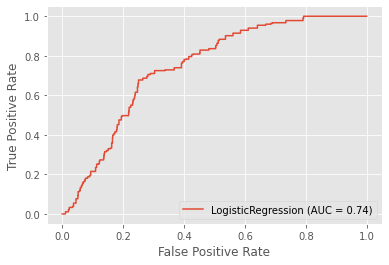

In [29]:
y = features_df['Injury']
X = features_df.drop(columns=['Injury'])
y=np.array(y)
X=np.array(X)
print(len(X[0]))


res = RandomOverSampler(random_state=0,sampling_strategy=0.5)
X_resampled, y_resampled = res.fit_resample(X, y)
dt_yresam = pd.DataFrame(y_resampled)
dt_yresam.columns = ['T']
print(dt_yresam['T'].value_counts())
print(X_resampled,y_resampled) 

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=21,shuffle=True)    
#y_train, y_test = y[train_index], y[test_index]

print("Logistic Regression")
new1 = LogisticRegression(max_iter=5000)
new1.fit(X_train ,y_train)
y_pred = new1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))
print('Confusion Matrix: \n {}'.format(conf_matrix))
#plot_confusion_matrix(new1 , X_test, y_test)
print("F1-score")
print(f1_score(y_test, y_pred))
plot_roc_curve(new1,X_test, y_test)




(5713, 59)
DecisionTree
Accuracy: 0.7792439372325249
Confusion Matrix: 
 [[1595 1209]
 [  29 2775]]
F1-score
0.8176193282262818
DecisionTree
Accuracy: 0.7840584878744651
Confusion Matrix: 
 [[1724 1080]
 [ 131 2673]]
F1-score
0.815311880433125


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


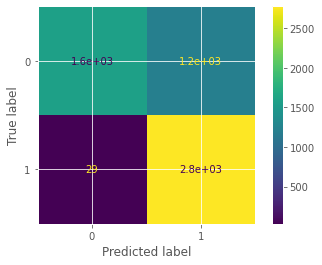

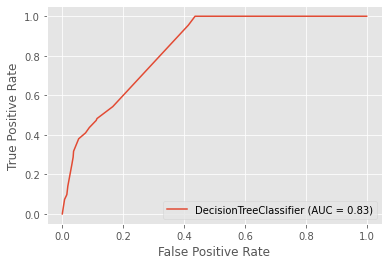

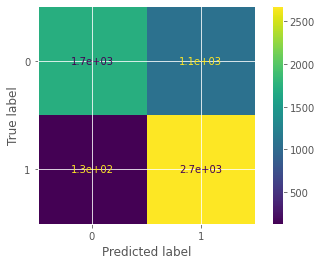

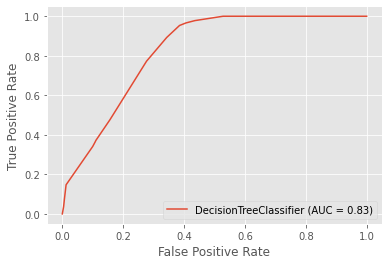

In [30]:
y = features_df['Injury']
X = features_df.drop(columns=['Injury'])
y=np.array(y)
X=np.array(X)
X = StandardScaler().fit_transform(X)
print(X.shape)
skf = StratifiedKFold(n_splits=2)
res = RandomOverSampler(random_state=0)
X_resampled, y_resampled = res.fit_resample(X, y)
for train_index, test_index in skf.split(X_resampled, y_resampled):
    
    X_train,X_test = X_resampled[train_index],X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]


    new = DecisionTreeClassifier(max_depth=8)
    new.fit(X_train,y_train)
    
    y_pred = new.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("DecisionTree")
    print('Accuracy: {}'.format(accuracy))
    print('Confusion Matrix: \n {}'.format(conf_matrix))
    plot_confusion_matrix(new, X_test, y_test)
    print("F1-score")
    print(f1_score(y_test, y_pred))
    plot_roc_curve(new,X_test, y_test)



    






/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0    5608
1    2804
Name: T, dtype: int64
(8412, 59) (8412,)
Accuracy: 0.9138443256090315
Confusion Matrix: 
 [[1027   97]
 [  48  511]]
F1-score
0.8757497857754927


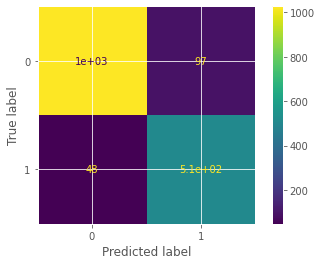

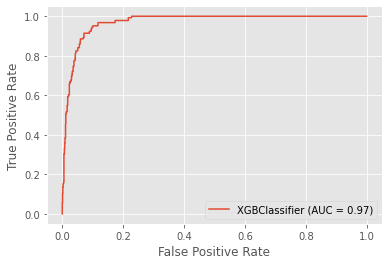

In [34]:

model = xgb.XGBClassifier(max_depth=4,
                      learning_rate=0.1,
                      n_estimators=150,
                      objective='binary:logistic',
                      booster='gbtree',
                      tree_method='auto',
                      n_jobs=50,
                      gamma=0,
                      min_child_weight=1,
                      max_delta_step=0,
                      subsample=1,
                      colsample_bytree=1,
                      colsample_bylevel=1,
                      colsample_bynode=1,
                      reg_alpha=0,
                      reg_lambda=1,
                      scale_pos_weight=1,
                      base_score=0.5,
                      random_state=0)

y = features_df['Injury']
X = features_df.drop(columns=['Injury'])
res = RandomOverSampler(random_state=0,sampling_strategy=0.5)
X_resampled, y_resampled = res.fit_resample(X, y)
dt_yresam = pd.DataFrame(y_resampled)
dt_yresam.columns = ['T']
print(dt_yresam['T'].value_counts())
print(X_resampled.shape,y_resampled.shape) 
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2,random_state=42,shuffle=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Accuracy: {}'.format(accuracy))
print('Confusion Matrix: \n {}'.format(conf_matrix))
plot_confusion_matrix(model, X_test, y_test)
print("F1-score")
print(f1_score(y_test, y_pred))
plot_roc_curve(model,X_test, y_test)



 0 , 0 - true negative   0,1 - false positive

 1 , 0 - false negative   1, 1 - true positive     



#**Problem** 2  Regression

In [ ]:
game_injury_df = injury_df.set_index('GameID').join(df1.set_index('GameID'), how = 'outer',lsuffix='_left', rsuffix='_right')
game_injury_df['DM_M1'] = game_injury_df['DM_M1'].fillna(0).astype(int)
game_injury_df['DM_M7'] = game_injury_df['DM_M7'].fillna(0).astype(int)
game_injury_df['DM_M28'] = game_injury_df['DM_M28'].fillna(0).astype(int)
game_injury_df['DM_M42'] = game_injury_df['DM_M42'].fillna(0).astype(int)
game_injury_df['Injury'] = game_injury_df['DM_M1'] + game_injury_df['DM_M7'] + game_injury_df['DM_M28'] + game_injury_df['DM_M42']
game_injury_df.drop(columns=['PlayerKey_left','BodyPart', 'PlayKey_right','PlayKey_left', 'PlayerKey_right', 'DM_M1', 'DM_M7', 'DM_M28', 'DM_M42','Surface','PlayerGamePlay'],axis=1,inplace=True)


print(game_injury_df['Injury'].value_counts())
condition1 = game_injury_df['Injury']!=0
features_df1=game_injury_df[condition1]
features_df1 = pd.get_dummies(features_df1)
print(features_df1['Injury'].value_counts())
features_df1
pd.DataFrame(features_df1).to_csv("/content/drive/My Drive/ML_project/data.csv")

0    5608
2      39
1      29
4      29
3       8
Name: Injury, dtype: int64
2    39
4    29
1    29
3     8
Name: Injury, dtype: int64


In [36]:
df = pd.read_csv('/content/drive/My Drive/ML_project/data.csv')
df

,GameID,PlayerDay,PlayerGame,Temperature,Injury,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Running Back,RosterPosition_Safety,RosterPosition_Tight End,RosterPosition_Wide Receiver,StadiumType_Dome,StadiumType_Indoor,StadiumType_Outdoor,StadiumType_Retractable Roof,FieldType_Natural,FieldType_Synthetic,Weather_Clear,Weather_Cloudy,Weather_Indoor,Weather_Rain,PlayType_Extra Point,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Returned,PlayType_Rush,Position_C,Position_CB,Position_DB,Position_DE,Position_DT,Position_FS,Position_ILB,Position_LB,Position_MLB,Position_OLB,Position_RB,Position_SS,Position_T,Position_TE,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_RB,PositionGroup_TE,PositionGroup_WR
0,31070-3,15,3,89,4,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,31933-20,394,20,84,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,33337-2,8,2,83,4,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,33337-8,365,8,81,3,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,33474-19,393,19,79,3,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,47307-10,74,10,68,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
101,47307-10,74,10,68,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
102,47334-8,58,8,74,2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
103,47382-3,18,3,-999,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [37]:
df.loc[(df.Temperature == -999),'Temperature']= 55

#changing the playdate values
df["PlayerDay"] = df["PlayerDay"].abs()
features_df1=df.set_index('GameID')
features_df1

,PlayerDay,PlayerGame,Temperature,Injury,RosterPosition_Cornerback,RosterPosition_Defensive Lineman,RosterPosition_Linebacker,RosterPosition_Offensive Lineman,RosterPosition_Running Back,RosterPosition_Safety,RosterPosition_Tight End,RosterPosition_Wide Receiver,StadiumType_Dome,StadiumType_Indoor,StadiumType_Outdoor,StadiumType_Retractable Roof,FieldType_Natural,FieldType_Synthetic,Weather_Clear,Weather_Cloudy,Weather_Indoor,Weather_Rain,PlayType_Extra Point,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Returned,PlayType_Rush,Position_C,Position_CB,Position_DB,Position_DE,Position_DT,Position_FS,Position_ILB,Position_LB,Position_MLB,Position_OLB,Position_RB,Position_SS,Position_T,Position_TE,Position_WR,PositionGroup_DB,PositionGroup_DL,PositionGroup_LB,PositionGroup_OL,PositionGroup_RB,PositionGroup_TE,PositionGroup_WR
GameID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31070-3,15,3,89,4,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
31933-20,394,20,84,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
33337-2,8,2,83,4,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
33337-8,365,8,81,3,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
33474-19,393,19,79,3,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47307-10,74,10,68,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
47307-10,74,10,68,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
47334-8,58,8,74,2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [38]:
import seaborn as sns


In [39]:
y = features_df1['Injury']
X = features_df1.drop(columns=['Injury'])
print(X.shape)
res = RandomOverSampler(random_state=0,sampling_strategy={1:2900, 2:3900, 3:800, 4:2900})
X_resampled, y_resampled = res.fit_resample(X, y)
dt_yresam = pd.DataFrame(y_resampled)
dt_yresam.columns = ['T']
print(dt_yresam['T'].value_counts())
#sns.countplot(x='T',data=dt_yresam, palette='hls')
dt_yresam.sample(frac=1)
print(X_resampled.shape)




(105, 51)
2    3900
4    2900
1    2900
3     800
Name: T, dtype: int64
(10500, 51)


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (2900) in class 1 will be larger than the number of samples in the majority class (class #2 -> 39)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (3900) in class 2 will be larger than the number of samples in the majority class (class #2 -> 39)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (800) in class 3 will be larger than the number of samples in the majority class (class #2 -> 39)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (2900) in class 4 will be larger than the number of samples in the majority class (class #2 -> 39)
  n_samples_majo

In [40]:
import random
from sklearn.linear_model import LinearRegression

In [41]:
lis1=[]
for i in y_resampled:
  if(i==0):
    lis1.append(0)
  elif(i==1):
    lis1.append(random.randint(1,6))
  elif(i==2):
    lis1.append(random.randint(7,14))
  elif(i==3):
    lis1.append(random.randint(15,28))
  elif(i==4):
    lis1.append(random.randint(29,42))

lis1=np.array(lis1)
print(lis1)


[42  4 29 ... 34 32 29]


In [42]:
import math

##Linear Reg

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,lis1, test_size=0.2,random_state=42,shuffle=True)
reg = LinearRegression(normalize=True).fit(X_train, y_train)
y_pred=reg.predict(X_test)
print(len(y_pred))
for i in range(len(y_pred)):
  y_pred[i]=int(round(y_pred[i]))
y_pred

2100


array([11., 17., 14., ..., 22., 21.,  9.])

In [84]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

135.35714285714286

In [85]:
from sklearn.manifold import TSNE

In [97]:
print(X_test.shape)

(2100, 51)


In [100]:
print(y_test.shape)

(2100,)


In [116]:
X_embedded = TSNE(n_components=1).fit_transform(X_test)


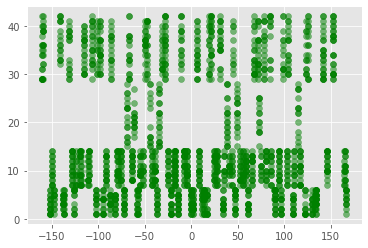

In [117]:
plt.scatter(X_embedded, y_test, color = 'green', alpha=0.5)

In [106]:
X_embedded = pd.DataFrame(X_embedded,columns = ['X'])
y_test_df = pd.DataFrame(y_test,columns=['Y'])
y_test_df

,Y
0,11
1,37
2,42
3,22
4,21
...,...
2095,1
2096,37
2097,36
2098,3


In [109]:
df= pd.concat([X_embedded,y_test_df],axis=1)

In [110]:
df

,X,Y
0,-79.710320,11
1,32.472229,37
2,-107.469162,42
3,-133.832840,22
4,55.907974,21
...,...,...
2095,87.465187,1
2096,-96.699593,37
2097,23.035898,36
2098,112.096123,3


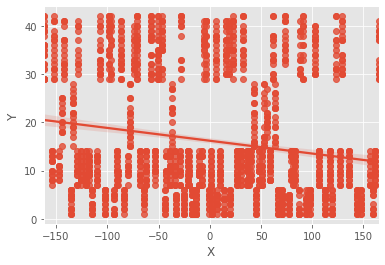

In [113]:
sns.regplot(x="X", y="Y", data=df);

In [61]:
red_coef = PCA(n_components=1).fit_transform([reg.coef_])
red_coef

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_pca.py:454: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ = (S ** 2) / (n_samples - 1)


array([[0.]])

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
regr = RandomForestRegressor(max_depth=20, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
for i in range(len(y_pred)):
  y_pred[i]=int(round(y_pred[i]))
print(y_pred)
print(y_test)

[11. 36. 36. ... 35.  3.  4.]
[11 37 42 ... 36  3  3]


In [66]:
mean_squared_error(y_test, y_pred)

8.728571428571428

In [69]:
regr.criterion

'mse'

##SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)
y_pred=regr.predict(X_test)
for i in range(len(y_pred)):
  y_pred[i]=int(round(y_pred[i]))
print(y_pred)
print(y_test)

[10. 24. 18. ... 29.  4.  4.]
[ 7 37 38 ... 38  5  2]


In [ ]:
mean_squared_error(y_test, y_pred)

34.668571428571425

#**Problem 3**

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

In [79]:
res = RandomOverSampler(random_state=0)

In [80]:
problem3_df = injury_df.set_index('GameID').join(df1.set_index('GameID'), how = 'inner',lsuffix='_left', rsuffix='_right')
y = np.array(problem3_df['BodyPart'])
problem3_df.drop(columns=['PlayKey_left','PlayerKey_left','PlayerKey_right','PlayKey_right','PlayerGamePlay','BodyPart'],inplace=True)
problem3_df1 = pd.get_dummies(problem3_df, dummy_na = False)
X = np.array(problem3_df1)
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

{'Ankle': 42, 'Foot': 7, 'Heel': 1, 'Knee': 48, 'Toes': 7}


In [81]:
res = RandomOverSampler(random_state=0,sampling_strategy={'Knee':480, 'Foot':70, 'Ankle':420, 'Heel':30,'Toes':70})
X_resampled, y_resampled = res.fit_resample(X, y)
print(X_resampled.shape)
print(y_resampled)

(1070, 57)
['Knee' 'Knee' 'Foot' ... 'Toes' 'Toes' 'Toes']


/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (480) in class Knee will be larger than the number of samples in the majority class (class #Knee -> 48)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (70) in class Foot will be larger than the number of samples in the majority class (class #Knee -> 48)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (420) in class Ankle will be larger than the number of samples in the majority class (class #Knee -> 48)
  n_samples_majority))
/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (70) in class Toes will be larger than the number of samples in the majority class (class #Knee -> 

{'Ankle': 80, 'Foot': 11, 'Heel': 5, 'Knee': 105, 'Toes': 13}
Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy: 0.6952380952380952
Confusion Matrix: 
 [[28  0  0 13  1]
 [ 2  3  0  2  0]
 [ 0  0  1  0  0]
 [10  0  0 38  0]
 [ 4  0  0  0  3]]
Macro Values
Precision
0.8206689536878216
Recall
0.663095238095238
F Score
0.7098185167353944
Micro Values
Precision
0.6952380952380952
Recall
0.6952380952380952
F Score
0.6952380952380952


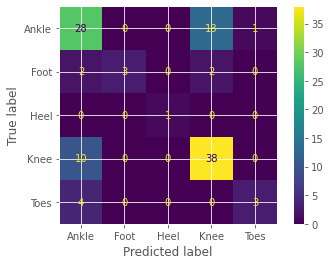

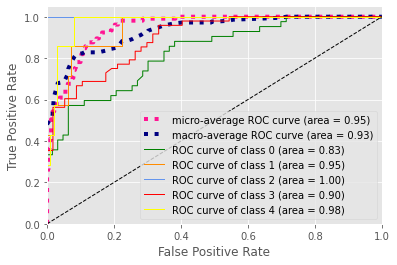

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=21,shuffle=True)    
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))
print("Logistic Regression")
new1 = LogisticRegression(max_iter=500)
new1.fit(X_train ,y_train)
#y_pred = new1.predict(X_test)
y_pred = new1.predict(X)
#accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y,y_pred)
conf_matrix = confusion_matrix(y, y_pred)
print('Accuracy: {}'.format(accuracy))
print('Confusion Matrix: \n {}'.format(conf_matrix))
plot_confusion_matrix(new1 , X, y)


print("Macro Values")
arr=precision_recall_fscore_support(y, y_pred, average='macro')
print("Precision")
print(arr[0])
print("Recall")
print(arr[1])
print("F Score")
print(arr[2])

print("Micro Values")
arr=precision_recall_fscore_support(y, y_pred, average='micro')
print("Precision")
print(arr[0])
print("Recall")
print(arr[1])
print("F Score")
print(arr[2])


n_classes = 5


y_score = new1.predict_proba(X)
#print(y_score)

y_test = label_binarize(y,classes=['Ankle','Foot','Heel','Knee','Toes'])
# Compute ROC curve and ROC area for each class


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw=1
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


DecisionTree
Accuracy: 0.8952380952380953
Confusion Matrix: 
 [[39  0  0  1  2]
 [ 3  4  0  0  0]
 [ 0  0  1  0  0]
 [ 3  1  0 43  1]
 [ 0  0  0  0  7]]
Macro Values
Precision
0.8687878787878789
Recall
0.8791666666666668
F Score
0.8643060822529911
Micro Values
Precision
0.8952380952380953
Recall
0.8952380952380953
F Score
0.8952380952380953


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


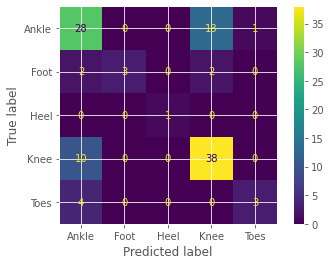

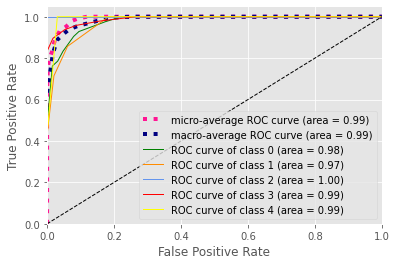

DecisionTree
Accuracy: 0.9619047619047619
Confusion Matrix: 
 [[41  0  0  0  1]
 [ 0  7  0  0  0]
 [ 0  0  1  0  0]
 [ 2  0  0 46  0]
 [ 0  1  0  0  6]]
Macro Values
Precision
0.937126245847176
Recall
0.9583333333333334
F Score
0.94678109541689
Micro Values
Precision
0.9619047619047619
Recall
0.9619047619047619
F Score
0.9619047619047619


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


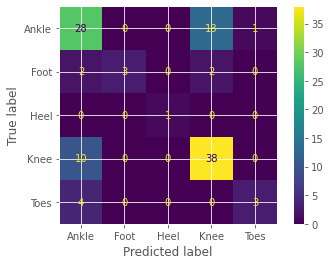

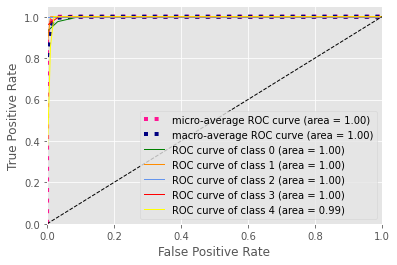

In [83]:
for train_index, test_index in skf.split(X_resampled, y_resampled):
    
    X_train,X_test = X_resampled[train_index],X_resampled[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]

    new = DecisionTreeClassifier(max_depth=8)
    new.fit(X_train,y_train)
    
    y_pred = new.predict(X)
    accuracy = accuracy_score(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    print("DecisionTree")
    accuracy = accuracy_score(y,y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    print('Accuracy: {}'.format(accuracy))
    print('Confusion Matrix: \n {}'.format(conf_matrix))
    plot_confusion_matrix(new1 , X, y)


    print("Macro Values")
    arr=precision_recall_fscore_support(y, y_pred, average='macro')
    print("Precision")
    print(arr[0])
    print("Recall")
    print(arr[1])
    print("F Score")
    print(arr[2])

    print("Micro Values")
    arr=precision_recall_fscore_support(y, y_pred, average='micro')
    print("Precision")
    print(arr[0])
    print("Recall")
    print(arr[1])
    print("F Score")
    print(arr[2])


    n_classes = 5


    y_score = new.predict_proba(X)
    #print(y_score)

    y_test = label_binarize(y,classes=['Ankle','Foot','Heel','Knee','Toes'])
    # Compute ROC curve and ROC area for each class


    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    lw=1
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['green', 'darkorange', 'cornflowerblue','red','yellow'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()



##MLP Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Accuracy: 0.9428571428571428
Confusion Matrix: 
 [[39  0  0  3  0]
 [ 0  7  0  0  0]
 [ 0  0  1  0  0]
 [ 2  0  0 46  0]
 [ 1  0  0  0  6]]
Macro Values
Precision
0.9734693877551021
Recall
0.9488095238095239
F Score
0.960020391979155
Micro Values
Precision
0.9428571428571428
Recall
0.9428571428571428
F Score
0.9428571428571428


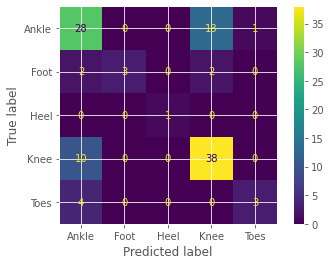

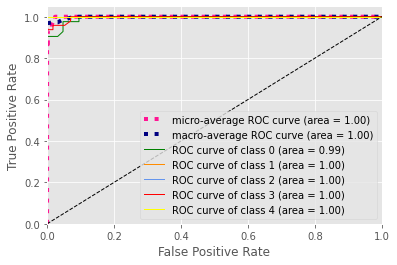

In [84]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=21,shuffle=True) 
clf = MLPClassifier(random_state=1).fit(X_train, y_train)
y_pred = clf.predict(X)



accuracy = accuracy_score(y,y_pred)
conf_matrix = confusion_matrix(y, y_pred)
print('Accuracy: {}'.format(accuracy))
print('Confusion Matrix: \n {}'.format(conf_matrix))
plot_confusion_matrix(new1 , X, y)


print("Macro Values")
arr=precision_recall_fscore_support(y, y_pred, average='macro')
print("Precision")
print(arr[0])
print("Recall")
print(arr[1])
print("F Score")
print(arr[2])

print("Micro Values")
arr=precision_recall_fscore_support(y, y_pred, average='micro')
print("Precision")
print(arr[0])
print("Recall")
print(arr[1])
print("F Score")
print(arr[2])


n_classes = 5


y_score = clf.predict_proba(X)
#print(y_score)

y_test = label_binarize(y,classes=['Ankle','Foot','Heel','Knee','Toes'])
# Compute ROC curve and ROC area for each class


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw=1
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['green', 'darkorange', 'cornflowerblue','red','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()




#**Problem4** Deep Learning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.patches as patches
sns.set_style("whitegrid")


In [4]:
inj = pd.read_csv('/content/drive/My Drive/ML_project/InjuryRecord.csv')

NameError: ignored

In [4]:
trk = pd.read_csv('/content/drive/My Drive/ML_project/PlayerTrackData.csv')
trk.head()

,PlayKey,time,event,x,y,dir,dis,o,s
0,26624-1-1,0.0,huddle_start_offense,87.46,28.93,288.24,0.01,262.33,0.13
1,26624-1-1,0.1,NaN,87.45,28.92,283.91,0.01,261.69,0.12
2,26624-1-1,0.2,NaN,87.44,28.92,280.40,0.01,261.17,0.12
3,26624-1-1,0.3,NaN,87.44,28.92,278.79,0.01,260.66,0.10
4,26624-1-1,0.4,NaN,87.44,28.92,275.44,0.01,260.27,0.09


In [2]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

In [3]:
example_play_id = inj['PlayKey'].values[2]
example_play_id

NameError: ignored

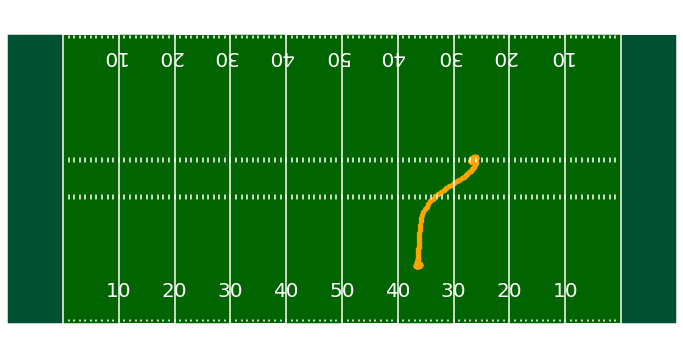

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = create_football_field()
trk.query('PlayKey == @example_play_id').plot(kind='scatter', x='x', y='y', ax=ax, color='orange')
plt.show()
plt.savefig('test.jpeg')

In [9]:
inj_play_list = inj['PlayKey'].tolist()

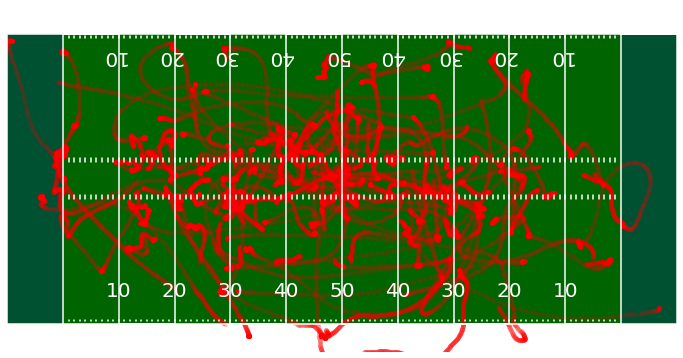

In [121]:
fig, ax = create_football_field()
for playkey, inj_play in trk.query('PlayKey in @inj_play_list').groupby('PlayKey'):
    inj_play.plot(kind='scatter', x='x', y='y', ax=ax, color='red',alpha=0.2)
plt.xlabel('Injured Player Motion')
plt.show()

In [1]:
fig, ax = create_football_field()
for playkey, inj_play in trk.query('PlayKey not in @inj_play_list').head(500).groupby('PlayKey'):
    inj_play.plot(kind='scatter', x='x', y='y', ax=ax, color='orange', alpha=0.2)
plt.show()

NameError: ignored